In [1]:
%matplotlib inline
import sys
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
from google.colab import files

uploaded = files.upload()

Saving SAT_District_Participation.csv to SAT_District_Participation.csv


In [2]:
import pandas as pd
import io

ct_test = pd.read_csv(io.BytesIO(uploaded['SAT_District_Participation.csv']))
print(ct_test.head())

   District Number    District  Participation Rate
0                2     Ansonia                0.66
1                4        Avon                0.90
2                7      Berlin                0.81
3                9      Bethel                0.86
4               11  Bloomfield                0.81


In [3]:
mean_rate = ct_test['Participation Rate'].mean()

# ddof is the degrees of freedom correction
# in the calculation of standard deviation
# for population standard deviation ddof = 0

stdev_rate = ct_test['Participation Rate'].std(ddof=0)

In [4]:
print("Mean participation rate is {:.3f}".format(mean_rate))
print("Standard deviation is {:.3f}".format(stdev_rate))

Mean participation rate is 0.740
Standard deviation is 0.135


In [5]:
#Calculating z score from scipy stats
zscore_rate = ss.zscore(ct_test['Participation Rate'], ddof=0, nan_policy='omit') # nan_policy omits any nan values and keeps all numbers
ct_test = ct_test.assign(zscore=zscore_rate)
ct_test.head(8)

,District Number,District,Participation Rate,zscore
0,2,Ansonia,0.66,-0.595450
1,4,Avon,0.90,1.180730
2,7,Berlin,0.81,0.514663
3,9,Bethel,0.86,0.884700
4,11,Bloomfield,0.81,0.514663
5,12,Bolton,0.85,0.810693
6,14,Branford,0.77,0.218633
7,15,Bridgeport,0.58,-1.187510


In [6]:
def plot_anomaly(score_data, threshold):

    # Mask to plot values above and below the threshold in different colors
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1,  len(score_data), len(score_data))
    mask_outlier = (score_data < threshold)

    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier], 'o', color='b', label='OK schools')
    plt.plot(ranks[mask_outlier], score_data[mask_outlier], 'o', color='r', label='anomalies')
    plt.axhline(threshold, color='r', label='threshold', alpha=0.5)
    plt.legend(loc='lower left')
    plt.title('Z-score vs. school district', fontweight='bold')
    plt.xlabel('Ranked school district')
    plt.ylabel('Z=score')
    plt.show()

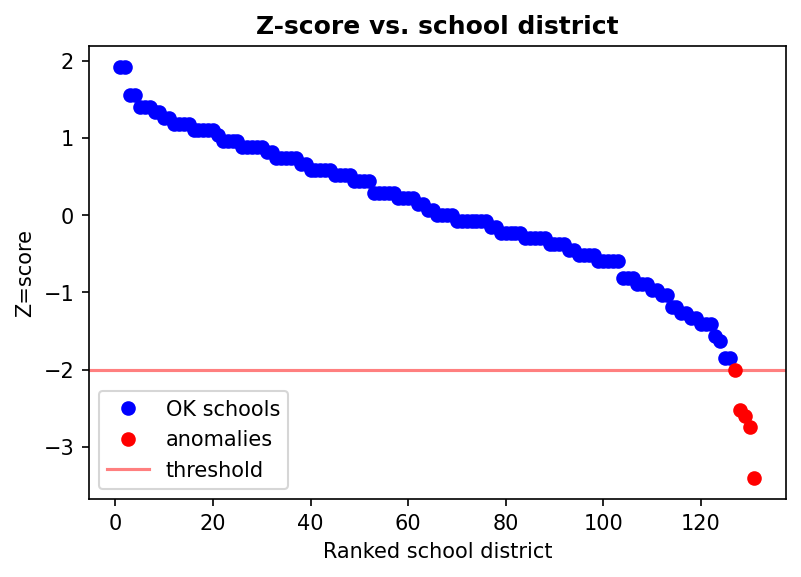

In [7]:
plot_anomaly(ct_test['zscore'], -2) # can change the threshold accordingly

In [8]:
zscore_anomalies = ct_test[(ct_test['zscore'] < -2)]
zscore_anomalies

,District Number,District,Participation Rate,zscore
50,89,New Britain,0.40,-2.519645
55,95,New London,0.47,-2.001592
99,163,Windham,0.37,-2.741667
121,253,Eastern Connecticut Regional Educational Servi...,0.39,-2.593652
125,282,Stamford Academy,0.28,-3.407734


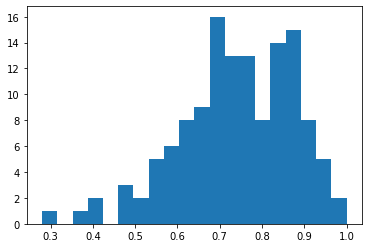

In [14]:
nbins = 20
n_hist, bins_hist, patches_hist = plt.hist(ct_test['Participation Rate'], nbins, density=False, cumulative=False, linewidth=1.0, label='data')

In [15]:
# the above is a left skewed graph (less data on the left side, and more on the right side)
# therefore, it is not normally distributed

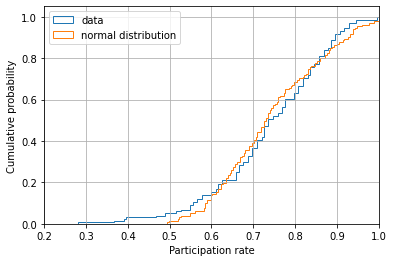

In [26]:
num_bins = 131
normal_dist = [random.gauss(mean_rate, stdev_rate) for _ in range(131)]
n, bins, patches = plt.hist(ct_test['Participation Rate'], bins=num_bins, density=True, histtype='step', cumulative=True, linewidth=1.0, label='data')
plt.hist(normal_dist, bins=num_bins, density=True, histtype='step', cumulative=True, linewidth=1.0, label='normal distribution')
plt.grid(True)
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_xlim([0.2, 1])
plt.xlabel('Participation rate')
plt.ylabel('Cumulative probability')
plt.show()

In [27]:
# not normally distributed, since the gaussian normaal distribution (orange graph) does not exactly coincide with the data
# also, the fact that it starts later than data tells us that anomalies lie before the start of the normal graph